In [60]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [50]:
#for viewing info
'''
df= yf.Ticker('MSFT')
df.info
or
df= yf.Tickers('MSFT AAPL')
df.tickers['MSFT'].info
'''
#download to see the proper cols
df = yf.download('GOOG', period='6mo')
df.head(5)
#shape: (123, 5)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-12-05,173.914322,177.306613,173.615000,176.917499,16145500
2024-12-06,176.089401,176.437608,173.156072,173.485325,13319500
2024-12-09,176.898468,177.837386,175.200390,175.515034,19887800
2024-12-10,186.317734,187.816027,182.462126,184.325009,34317400
2024-12-11,196.486160,196.665948,186.048040,186.487541,41664500


In [51]:
df['nextClose'] = df[('Close', 'GOOG')].shift(1)
df = df[1:]
df.head()

Price,Close,High,Low,Open,Volume,nextClose
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,
2024-12-06,176.089401,176.437608,173.156072,173.485325,13319500,173.914322
2024-12-09,176.898468,177.837386,175.200390,175.515034,19887800,176.089401
2024-12-10,186.317734,187.816027,182.462126,184.325009,34317400,176.898468
2024-12-11,196.486160,196.665948,186.048040,186.487541,41664500,186.317734
2024-12-12,193.409653,196.481150,193.060045,196.076612,25197800,196.486160


In [57]:
features = df[['Open', 'High', 'Low', 'Volume']]
labels = df['nextClose']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [58]:
#training random forest
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
#model prediction
y_predict = model.predict(x_test)

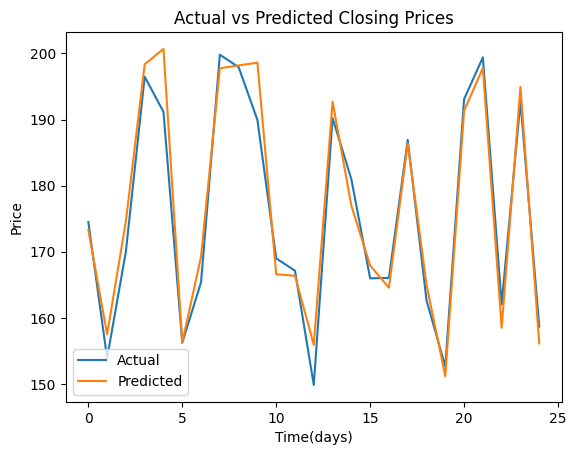

In [65]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_predict, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.legend()
plt.show()